<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-QAOA-Graph-and-circuit" data-toc-modified-id="Generate-QAOA-Graph-and-circuit-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate QAOA Graph and circuit</a></span></li><li><span><a href="#Get-latex-repr-of-circuit" data-toc-modified-id="Get-latex-repr-of-circuit-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get latex repr of circuit</a></span></li></ul></div>

In [1]:
import sys
sys.path.append('..')
import qtree
import cirq
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('whitegrid')
import networkx as nx

import utils_qaoa as qu
import utils

ModuleNotFoundError("No module named 'tensorflow'")


## Generate QAOA Graph and circuit

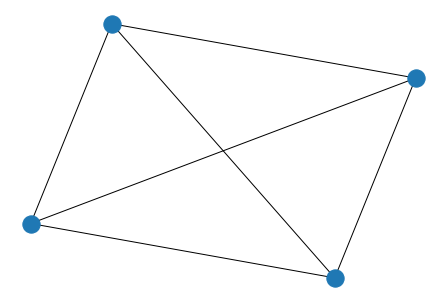

In [3]:

G = qu.get_test_graph(9, type='randomreg', degree=3)
qc, N = qu.get_test_qaoa(9, 1, type='randomreg', degree=3)

nx.draw(G)

In [4]:
qc

[[H(0), H(1), H(2), H(3)],
 [cX(0,1), ZPhase[alpha=3.14](1), cX(0,1)],
 [cX(0,3), ZPhase[alpha=3.14](3), cX(0,3)],
 [cX(0,2), ZPhase[alpha=3.14](2), cX(0,2)],
 [cX(1,2), ZPhase[alpha=3.14](2), cX(1,2)],
 [cX(1,3), ZPhase[alpha=3.14](3), cX(1,3)],
 [cX(2,3), ZPhase[alpha=3.14](3), cX(2,3)],
 [H(0), ZPhase[alpha=2.09](0), H(0)],
 [H(1), ZPhase[alpha=2.09](1), H(1)],
 [H(2), ZPhase[alpha=2.09](2), H(2)],
 [H(3), ZPhase[alpha=2.09](3), H(3)]]

In [126]:
ciq = qtree.baseline_sims.cirq.parse_circuit_1d(qc)
ciq

0: ───H───@──────────────@───@──────────────@───@──────────────@───H───Z^0.094────H───────────────────────────────────────────────────────────
          │              │   │              │   │              │
1: ───H───X───Z^(-6/7)───X───┼──────────────┼───┼──────────────┼───@──────────────@───@──────────────@───H───Z^0.094────H─────────────────────
                             │              │   │              │   │              │   │              │
2: ───H──────────────────────X───Z^(-6/7)───X───┼──────────────┼───┼──────────────┼───X───Z^(-6/7)───X───@──────────────@───H───Z^0.094───H───
                                                │              │   │              │                      │              │
3: ───H─────────────────────────────────────────X───Z^(-6/7)───X───X───Z^(-6/7)───X──────────────────────X───Z^(-6/7)───X───H───Z^0.094───H───

## Get latex repr of circuit

In [127]:
late = cirq.contrib.qcircuit.circuit_to_latex_using_qcircuit(ciq)
print(late)


\Qcircuit @R=1em @C=0.75em {
 \\
 &\lstick{\text{0}}& \qw&\gate{\text{H}} \qw&\control \qw    &                                      \qw&\control \qw    &\control \qw    &                                      \qw&\control \qw    &\control \qw    &                                      \qw&\control \qw    &\gate{\text{H}} \qw    &\gate{\text{Z}^{0.09399999999999986}} \qw&\gate{\text{H}} \qw    &         \qw    &                                      \qw&         \qw    &                \qw    &                                      \qw&                \qw    &                \qw&                                      \qw&                \qw&\qw\\
 &\lstick{\text{1}}& \qw&\gate{\text{H}} \qw&\targ    \qw\qwx&\gate{\text{Z}^{-0.8580000000000001}} \qw&\targ    \qw\qwx&         \qw\qwx&                                      \qw&         \qw\qwx&         \qw\qwx&                                      \qw&         \qw\qwx&\control        \qw    &                                      \qw&\control   

In [128]:
c = cirq.Circuit()
c.append(qc[1][1].to_cirq_1d_circ_op())

cirq.contrib.qcircuit.circuit_to_latex_using_qcircuit(c)

'\\Qcircuit @R=1em @C=0.75em {\n \\\\\n &\\lstick{\\text{1}}& \\qw&\\gate{\\text{Z}^{-0.8580000000000001}} \\qw&\\qw\\\\\n \\\\\n}'

In [129]:
c

1: ───Z^(-6/7)───

In [130]:
qc[1][1]


ZPhase[alpha=3.14](1)

In [131]:
o = cirq.ZPowGate(exponent=np.pi)
print(o)
c = cirq.Circuit()
c.append(o(cirq.LineQubit(1)))
c

Z**3.141592653589793


1: ───Z^(-6/7)───

In [132]:
late_par = late.replace('-0.8580000000000001', '2\gamma')
late_par = late_par.replace('0.09399999999999986', '2\\beta')
print(late_par)

\Qcircuit @R=1em @C=0.75em {
 \\
 &\lstick{\text{0}}& \qw&\gate{\text{H}} \qw&\control \qw    &                                      \qw&\control \qw    &\control \qw    &                                      \qw&\control \qw    &\control \qw    &                                      \qw&\control \qw    &\gate{\text{H}} \qw    &\gate{\text{Z}^{2\beta}} \qw&\gate{\text{H}} \qw    &         \qw    &                                      \qw&         \qw    &                \qw    &                                      \qw&                \qw    &                \qw&                                      \qw&                \qw&\qw\\
 &\lstick{\text{1}}& \qw&\gate{\text{H}} \qw&\targ    \qw\qwx&\gate{\text{Z}^{2\gamma}} \qw&\targ    \qw\qwx&         \qw\qwx&                                      \qw&         \qw\qwx&         \qw\qwx&                                      \qw&         \qw\qwx&\control        \qw    &                                      \qw&\control        \qw    &\control \qw

In [ ]:
## Dra

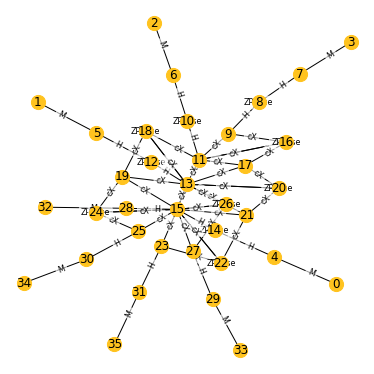

In [204]:
buck, _,_,_ = qtree.optimizer.circ2buckets(N, qc)
f = plt.figure(figsize=(5,5))
graph = qtree.graph_model.buckets2graph(buck)

bb = nx.edge_betweenness(graph, normalized=False)
bb = {(a,b,0):1/(100+v) for (a,b),v in bb.items()}
nx.set_edge_attributes(graph, bb, 'weight')

lay = nx.kamada_kawai_layout(graph, scale=4)
nx.draw(graph, lay, with_labels=True, node_color='#ffc31f',node_size=200)
labels = {
    e[:-1]:(e[-1]['tensor']['name'])
    for e in graph.edges(data=True)
}

nx.draw_networkx_edge_labels(graph,pos=lay, edge_labels=labels, font_size=8 ,label_pos=.6, bbox=dict(boxstyle='round4',fc='white',alpha=0.6))

plt.savefig('figures/expr_graph_no_selfloops_9_42d3.pdf')

In [201]:
for e in graph.edges(data=True):
    print(e[-1]['tensor'])

{'name': 'M', 'indices': (0, 4), 'data_key': -7382747283823641073}
{'name': 'H', 'indices': (4, 14), 'data_key': -5310761597117597119}
{'name': 'M', 'indices': (1, 5), 'data_key': -7382747283823641073}
{'name': 'H', 'indices': (5, 12), 'data_key': -5310761597117597119}
{'name': 'M', 'indices': (2, 6), 'data_key': -7382747283823641073}
{'name': 'H', 'indices': (6, 10), 'data_key': -5310761597117597119}
{'name': 'M', 'indices': (3, 7), 'data_key': -7382747283823641073}
{'name': 'H', 'indices': (7, 8), 'data_key': -5310761597117597119}
{'name': 'ZPhase', 'indices': (14,), 'data_key': 2642604580533179181}
{'name': 'H', 'indices': (14, 15), 'data_key': -5310761597117597119}
{'name': 'ZPhase', 'indices': (12,), 'data_key': 2642604580325334381}
{'name': 'H', 'indices': (12, 13), 'data_key': -5310761597117597119}
{'name': 'ZPhase', 'indices': (10,), 'data_key': 2642604581988092781}
{'name': 'H', 'indices': (10, 11), 'data_key': -5310761597117597119}
{'name': 'ZPhase', 'indices': (8,), 'data_ke